# CTG dataset

## Opis seta podataka:

Set podataka sastoji se od 2126 mjerenja i klasifikacija fetusnih otkucaja srca (eng. FHR - foetal heart rate).

Učitavanje python modula i podataka:

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')

path='CTG.csv'

# CSV datoteka učitava se kao dataframe u df varijablu
df = pd.read_csv(path, sep=',')

df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,35400,CTG0001.txt,240,357,120,120,0,0,0,...,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,35188,CTG0002.txt,5,632,132,132,4,0,4,...,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,35188,CTG0003.txt,177,779,133,133,2,0,5,...,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,35188,CTG0004.txt,411,1192,134,134,2,0,6,...,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,35188,CTG0005.txt,533,1147,132,132,4,0,5,...,0,0,0,0,0,0,0,0,2,1


In [2]:
# Info o podatcima
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
FileName    2126 non-null object
Date        2126 non-null int64
SegFile     2126 non-null object
b           2126 non-null int64
e           2126 non-null int64
LBE         2126 non-null int64
LB          2126 non-null int64
AC          2126 non-null int64
FM          2126 non-null int64
UC          2126 non-null int64
ASTV        2126 non-null int64
MSTV        2126 non-null float64
ALTV        2126 non-null int64
MLTV        2126 non-null float64
DL          2126 non-null int64
DS          2126 non-null int64
DP          2126 non-null int64
DR          2126 non-null int64
Width       2126 non-null int64
Min         2126 non-null int64
Max         2126 non-null int64
Nmax        2126 non-null int64
Nzeros      2126 non-null int64
Mode        2126 non-null int64
Mean        2126 non-null int64
Median      2126 non-null int64
Variance    2126 non-null int64
Tendency    2126 non-nu

## 1. Kontrola kvalitete podataka

Prepoznavanje nedostajućih vrijednosti:

In [3]:
# Ova naredba daje popis stupaca s nedostajućim vrijednostima
df.columns[df.isnull().any()]

Index([], dtype='object')

In [4]:
# Iz ćelije iznad možemo vidjeti da nema nedostajućih vrijednosti u dataset-u
# Naredba ispod za primjer ispisuje retke s nedostajućim vrijednostima u varijabli "FileName"
df[df['FileName'].isnull()]

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP


In [5]:
# Tipovi podataka po atributima u dataset-u
# Atributi "FileName" i "SegFile" su "object" jer sadrže nazive datoteka s .txt ekstenzijom
df.dtypes

FileName     object
Date          int64
SegFile      object
b             int64
e             int64
LBE           int64
LB            int64
AC            int64
FM            int64
UC            int64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
DL            int64
DS            int64
DP            int64
DR            int64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
A             int64
B             int64
C             int64
D             int64
E             int64
AD            int64
DE            int64
LD            int64
FS            int64
SUSP          int64
CLASS         int64
NSP           int64
dtype: object

Ispod se nalazi popis kontinuiranih varijabli za koje možemo provjeriti distribuciju:

In [6]:
continous = ['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance'];

C:\Users\marin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\marin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<Figure size 432x288 with 0 Axes>

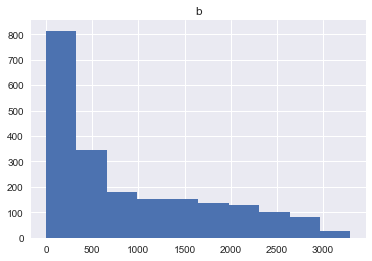

<Figure size 432x288 with 0 Axes>

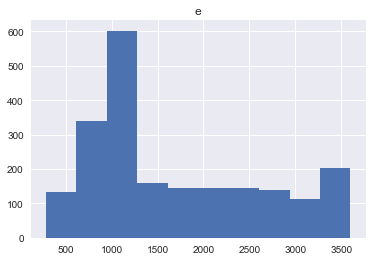

<Figure size 432x288 with 0 Axes>

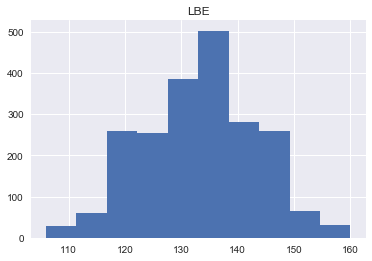

<Figure size 432x288 with 0 Axes>

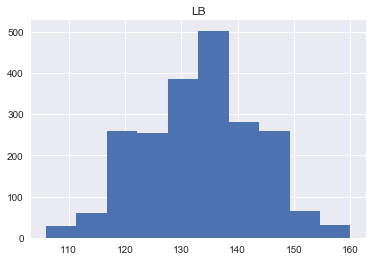

<Figure size 432x288 with 0 Axes>

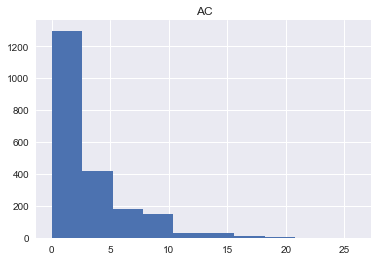

<Figure size 432x288 with 0 Axes>

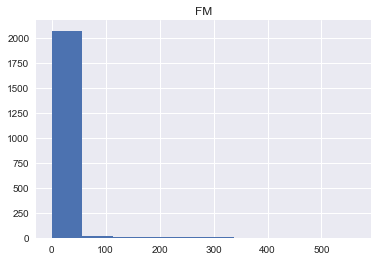

<Figure size 432x288 with 0 Axes>

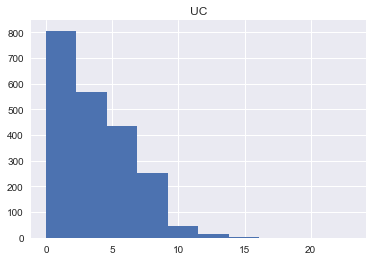

<Figure size 432x288 with 0 Axes>

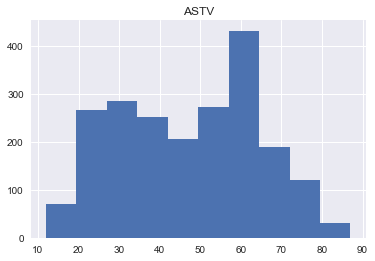

<Figure size 432x288 with 0 Axes>

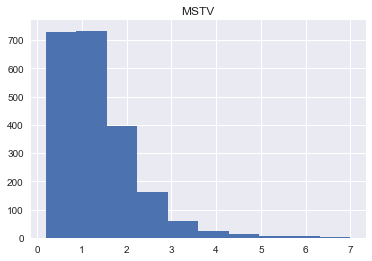

<Figure size 432x288 with 0 Axes>

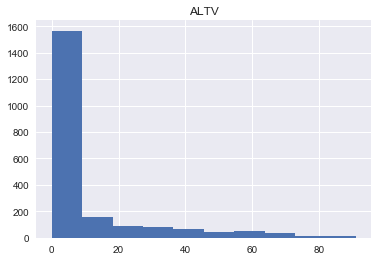

<Figure size 432x288 with 0 Axes>

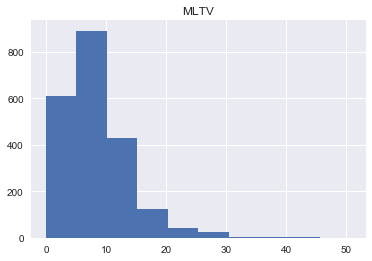

<Figure size 432x288 with 0 Axes>

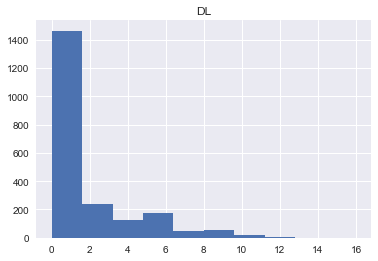

<Figure size 432x288 with 0 Axes>

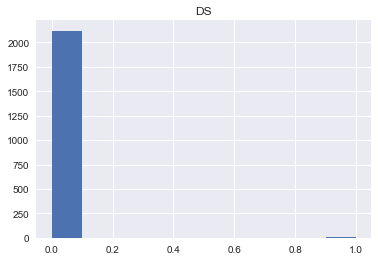

<Figure size 432x288 with 0 Axes>

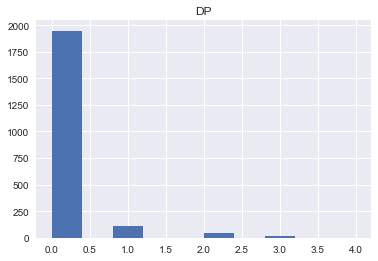

<Figure size 432x288 with 0 Axes>

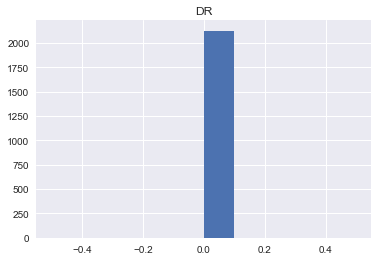

<Figure size 432x288 with 0 Axes>

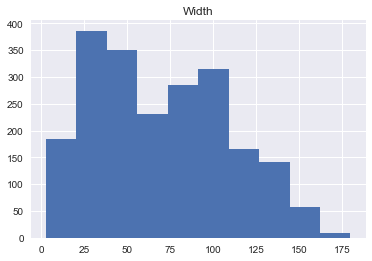

<Figure size 432x288 with 0 Axes>

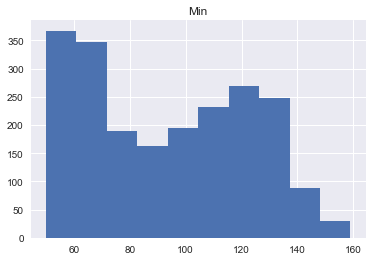

<Figure size 432x288 with 0 Axes>

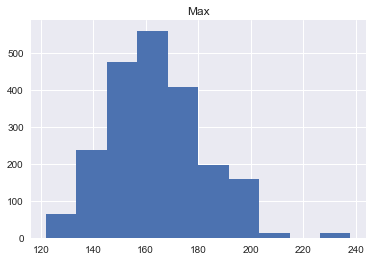

<Figure size 432x288 with 0 Axes>

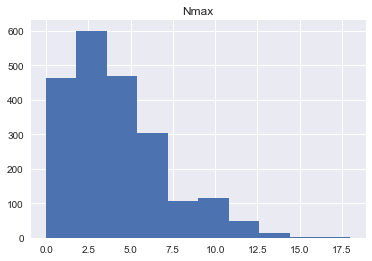

<Figure size 432x288 with 0 Axes>

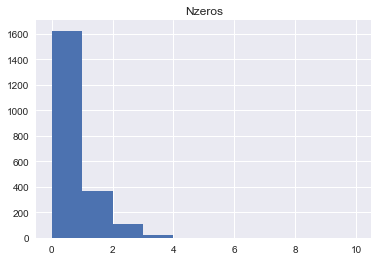

<Figure size 432x288 with 0 Axes>

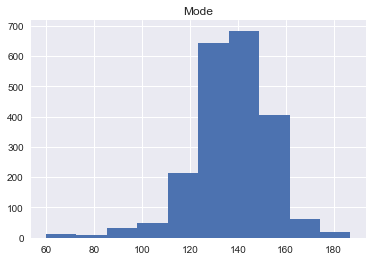

<Figure size 432x288 with 0 Axes>

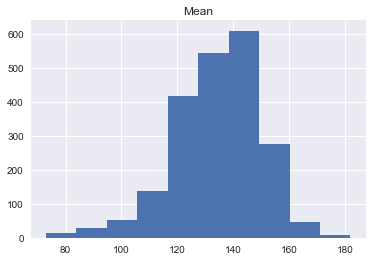

<Figure size 432x288 with 0 Axes>

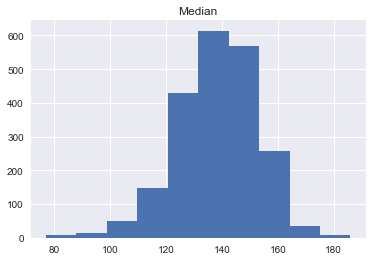

<Figure size 432x288 with 0 Axes>

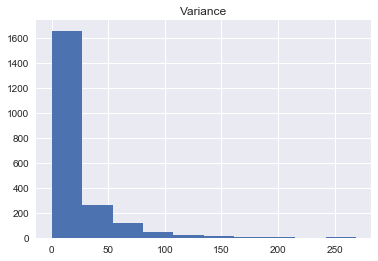

In [7]:
# Plot s distribucijama - matplotlib
for column in continous:
    plt.figure()
    df.hist([column])

C:\Users\marin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


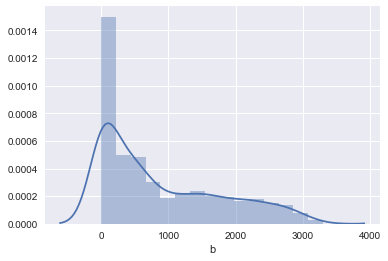

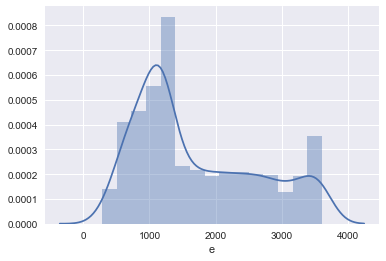

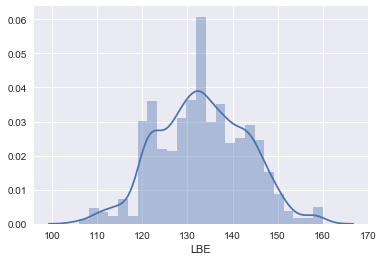

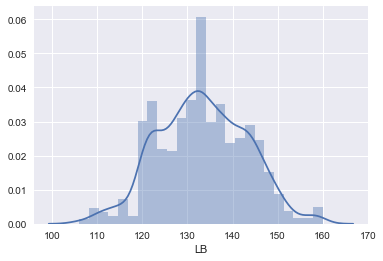

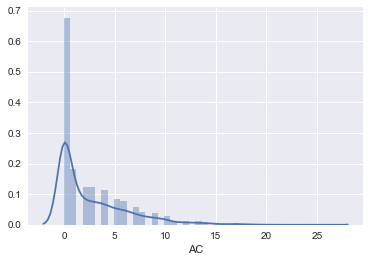

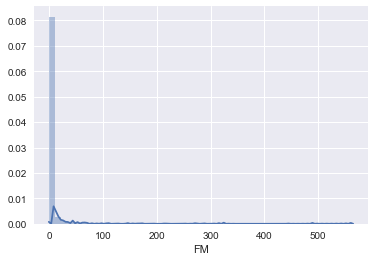

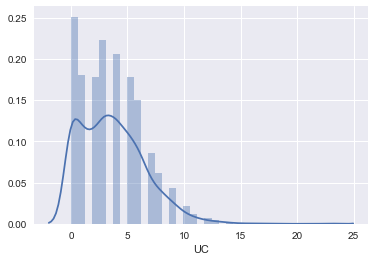

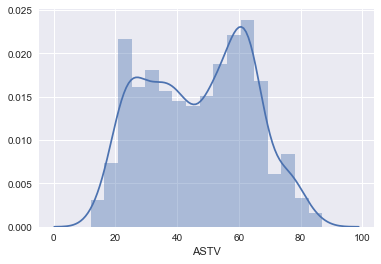

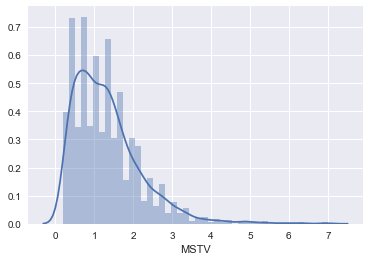

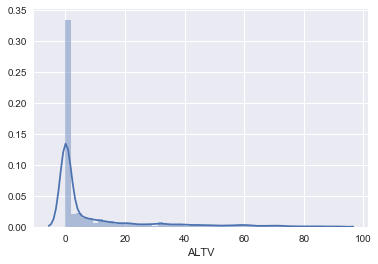

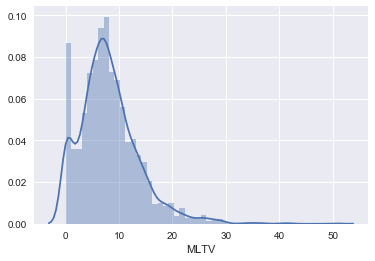

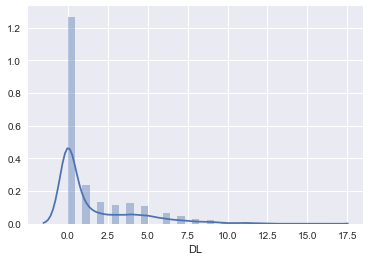

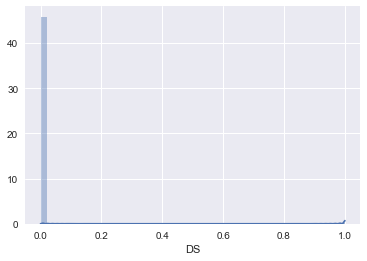

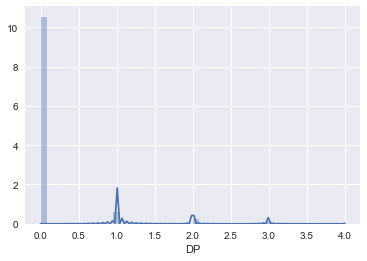

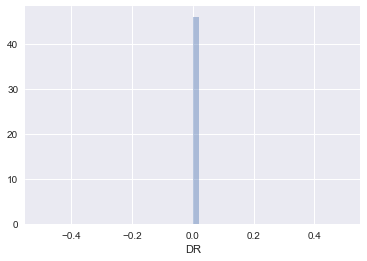

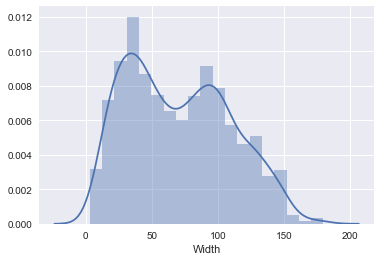

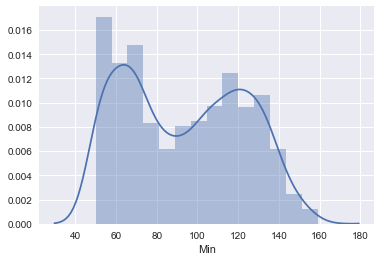

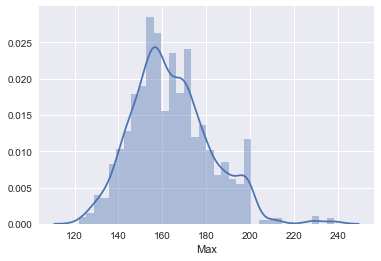

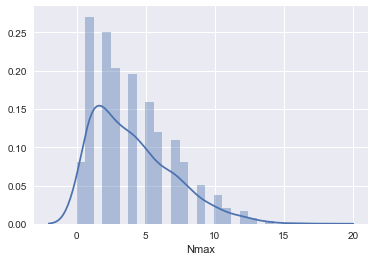

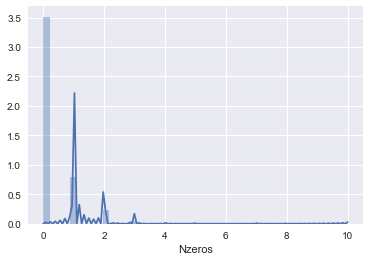

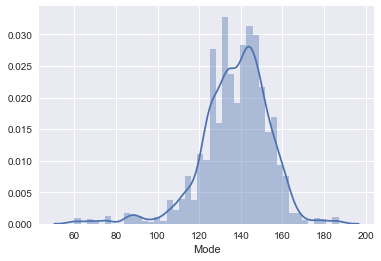

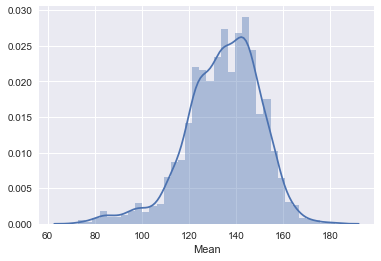

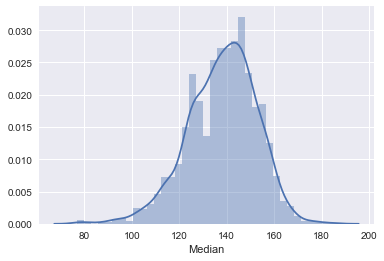

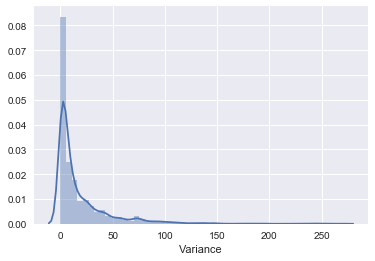

In [8]:
# Plot s distribucijama - seaborn
for column in continous:
    plt.figure()
    sns.distplot(df[column])

Iz grafova iznad možemo vidjeti da varijabla b ima pozitivno asimetričnu normalnu distribuciju, a razlog tome je što većina mjerenja počinje od nule pa je b u puno slučajeva 0. e je završna (end) isntanca i zavisi o varijabli b što objašnjava nelogičnu distribuciju za e.

Varijabla AC predstavlja ubrzanja (rada srca) za što možemo pretpostaviti da nije nešto što se događa pri svakom mjerenju pa možemo zaključiti da ima smisla što je vrijednost AC najčešće 0 i distribucija je pozitivno asimetrična.

FM predstavlja fetalne pokrete (enf. foetal movement) i za većinu mjerenja ima vrijednost 0 jer se također ne događa pri svakom mjerenju.

Iz istih gore navedenih razloga, varijable UC, MSTV, ALTV, MLTC, DL, DS, DP i Nzeros imaju puno vrijednosti 0 jer mjere događaje koji se ne događaju tijekom svakog mjerenja što objašnjava također pozitivno asimetričnu distribuciju.

DR ima vrijednost 0 za sva mjerenja jer mjeri broj događaja (Repetitive decelerations) koji se nije dogodio tijekom niti jednog od 2126 mjerenja pa ga možemo izbaciti iz analize.

Za ciljnu varijablu možemo odabrati "NSP" koja je zapravo klasifikacija s vrijednostima: Normal=1; Suspect=2; Pathologic=3

1 - normalno stanje

2 - stanje na koje se sumnja da je bolest

3 - bolest

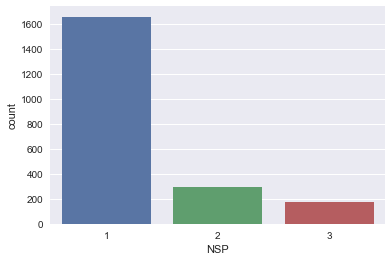

In [9]:
# Frekvencijski prikaz vrijednosti ciljne varijable NSP
sns.countplot(x="NSP", data=df)

## 2. Statističke analize uzorka podataka

In [10]:
# Popis kategoričkih vrijednosti
categoric = ['Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']

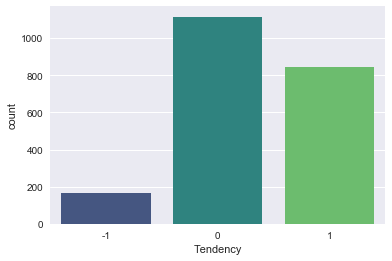

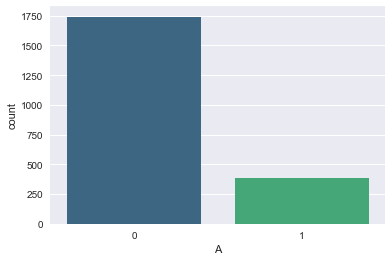

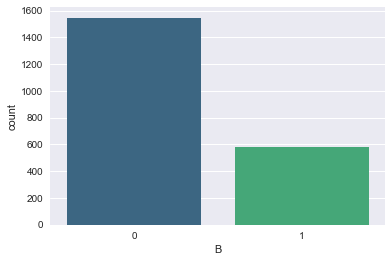

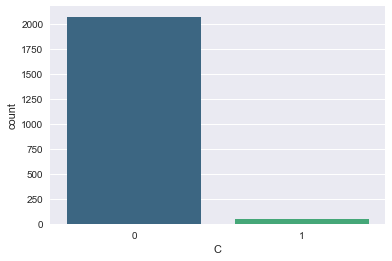

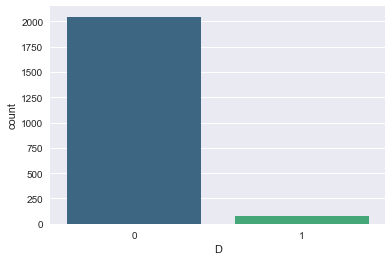

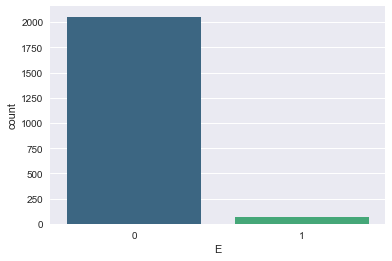

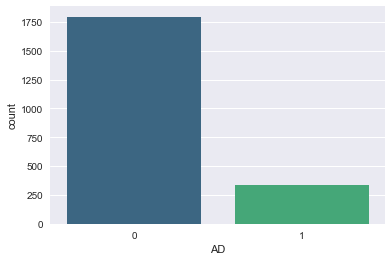

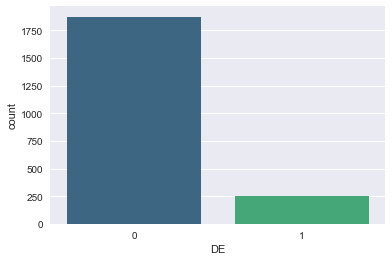

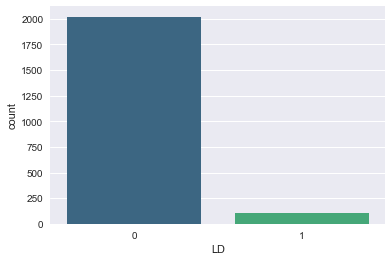

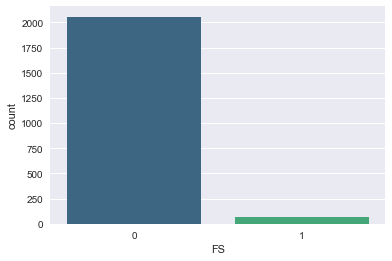

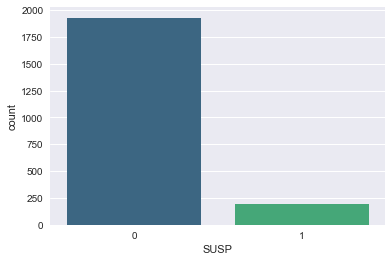

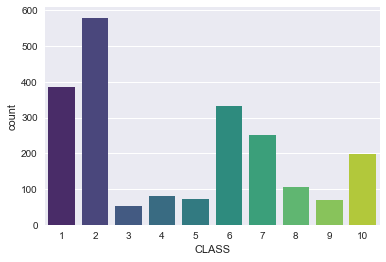

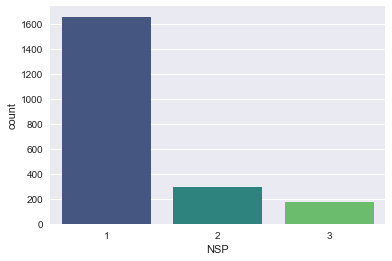

In [11]:
# distribucija frekvencija za kategoričke varijable
# Plot s frekvencijama - seaborn
for column in categoric:
    plt.figure()
    sns.countplot(x=column, data=df, palette='viridis')

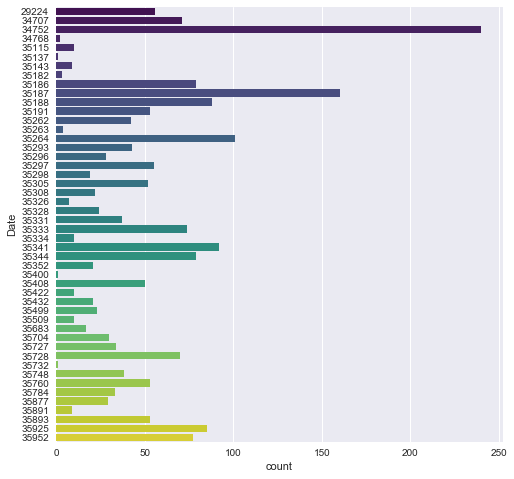

In [12]:
# "Date" se također može uzeti kao kategorička varijabla, ali zbog 
# različitosti distribucije od ostalih kategoričkih varijabli, prikazan je na y osi
# iz grafa se vidi da je najviše mjerenja zabilježeno na datum označen kao 34752
# u analizi nije koristan jer možemo pretpostaviti da je svako mjerenje izvršeno na zasebnoj jedinki, a tu datum ne igra ulogu u ovom slučaju
plt.figure(figsize=(8,8))
sns.countplot(y="Date", data=df, palette='viridis')

Računanje srednje vrijednosti:

In [13]:
# izrada dataframe-a s isključivo kontinuiranim varijablama tj. brisanje kategoričkih vrijednosti iz kopije originalnog df-a

# kopiranje originalnog dataframe-a
contdf = df.copy()

# brisanje kategoričkih vrijednosti
todelete = ['FileName', 'SegFile', 'Date', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP', 'DR']

for column in todelete:
    del contdf[column]

# prukaz deskriptivne statistike za sve kontinuirane varijable, sadrži srednju vrijednost i standardno odstupanje (mean i std)
# uz to još prikazuje broj vrijednosti, minimum/maksimum i percentile
statistics = contdf.describe()

statistics

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,...,0.126058,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090
std,894.084748,930.919143,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,...,0.464361,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,...,0.000000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,...,0.000000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000
75%,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,...,0.000000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000
max,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,...,4.000000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000


In [14]:
# računanje z vrijednosti

zdata = contdf.copy()

for col in zdata:
    col_zscore = col + '_zscore'
    zdata[col_zscore] = (zdata[col] - zdata[col].mean())/zdata[col].std(ddof=0)

# prikaz z vrijednosti  
zdata.iloc[:,23:]

,b_zscore,e_zscore,LBE_zscore,LB_zscore,AC_zscore,FM_zscore,UC_zscore,ASTV_zscore,MSTV_zscore,ALTV_zscore,...,DP_zscore,Width_zscore,Min_zscore,Max_zscore,Nmax_zscore,Nzeros_zscore,Mode_zscore,Mean_zscore,Median_zscore,Variance_zscore
0,-0.714239,-1.446091,-1.352220,-1.352220,-0.764740,-0.195096,-1.285798,1.513190,-0.943095,1.802542,...,-0.27153,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569
1,-0.977139,-1.150615,-0.132526,-0.132526,0.358852,-0.195096,0.119475,-1.744751,0.868841,-0.535361,...,-0.27153,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998
2,-0.784718,-0.992669,-0.030884,-0.030884,-0.202944,-0.195096,0.470793,-1.802928,0.868841,-0.535361,...,-0.27153,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481
3,-0.522937,-0.548917,0.070757,0.070757,-0.202944,-0.195096,0.822111,-1.802928,1.208579,-0.535361,...,-0.27153,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481
4,-0.386452,-0.597268,-0.132526,-0.132526,0.358852,-0.195096,0.470793,-1.802928,1.208579,-0.535361,...,-0.27153,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1.320723,1.250803,0.680604,0.680604,-0.764740,-0.195096,0.822111,1.862255,-1.282833,0.823885,...,-0.27153,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173
2122,0.780378,1.250803,0.680604,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.660775,...,-0.27153,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656
2123,0.780378,0.959625,0.680604,0.680604,-0.483842,-0.195096,1.173429,1.862255,-1.056341,0.552035,...,-0.27153,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138
2124,0.780378,1.446355,0.680604,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.932624,...,-0.27153,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,0.892590,-0.511138


In [15]:
# računanje k vrijednosti

kdata = contdf.copy()

for column in kdata:
    kvalue = 'kScore_'+column 
    kdata[kvalue] = (kdata[column] - kdata[column].mean())/kdata[column].std(ddof=0)

kdata.iloc[:,23:]

,kScore_b,kScore_e,kScore_LBE,kScore_LB,kScore_AC,kScore_FM,kScore_UC,kScore_ASTV,kScore_MSTV,kScore_ALTV,...,kScore_DP,kScore_Width,kScore_Min,kScore_Max,kScore_Nmax,kScore_Nzeros,kScore_Mode,kScore_Mean,kScore_Median,kScore_Variance
0,-0.714239,-1.446091,-1.352220,-1.352220,-0.764740,-0.195096,-1.285798,1.513190,-0.943095,1.802542,...,-0.27153,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569
1,-0.977139,-1.150615,-0.132526,-0.132526,0.358852,-0.195096,0.119475,-1.744751,0.868841,-0.535361,...,-0.27153,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998
2,-0.784718,-0.992669,-0.030884,-0.030884,-0.202944,-0.195096,0.470793,-1.802928,0.868841,-0.535361,...,-0.27153,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481
3,-0.522937,-0.548917,0.070757,0.070757,-0.202944,-0.195096,0.822111,-1.802928,1.208579,-0.535361,...,-0.27153,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481
4,-0.386452,-0.597268,-0.132526,-0.132526,0.358852,-0.195096,0.470793,-1.802928,1.208579,-0.535361,...,-0.27153,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1.320723,1.250803,0.680604,0.680604,-0.764740,-0.195096,0.822111,1.862255,-1.282833,0.823885,...,-0.27153,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173
2122,0.780378,1.250803,0.680604,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.660775,...,-0.27153,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656
2123,0.780378,0.959625,0.680604,0.680604,-0.483842,-0.195096,1.173429,1.862255,-1.056341,0.552035,...,-0.27153,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138
2124,0.780378,1.446355,0.680604,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.932624,...,-0.27153,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,0.892590,-0.511138


In [16]:
# zaobljenost
print("KURTOSIS")
print(contdf.copy().kurtosis())

KURTOSIS
b            -0.540230
e            -0.820215
LBE          -0.292943
LB           -0.292943
AC            3.122493
FM          104.634368
UC            1.289254
ASTV         -1.051030
MSTV          4.700756
ALTV          4.252998
MLTV          4.131254
DL            3.146846
DS          299.424142
DP           19.220444
Width        -0.902287
Min          -1.290422
Max           0.632769
Nmax          0.504211
Nzeros       30.365084
Mode          3.009531
Mean          0.933427
Median        0.667259
Variance     15.131589
dtype: float64


In [17]:
# nagnutost
print("SKEWNESS")
print(contdf.copy().skew())

SKEWNESS
b            0.829898
e            0.663002
LBE          0.020312
LB           0.020312
AC           1.658830
FM           9.427496
UC           0.835346
ASTV        -0.011829
MSTV         1.657339
ALTV         2.195075
MLTV         1.331998
DL           1.819119
DS          17.353457
DP           4.235888
Width        0.314235
Min          0.115784
Max          0.577862
Nmax         0.892886
Nzeros       3.920287
Mode        -0.995178
Mean        -0.651019
Median      -0.478414
Variance     3.219974
dtype: float64


Korelacija:

In [18]:
# računanje koeficijenata korelacije s ciljnom varijablom NSP 

corrdata = df.copy()

del corrdata["FileName"]
del corrdata["Date"]
del corrdata["SegFile"]
del corrdata["DR"]

print("Korelacije s ciljnom varijablom (NSP):")
for column in corrdata:
    print(column + ': ' + str(corrdata[column].corr(corrdata['NSP'])))

Korelacije s ciljnom varijablom (NSP):
b: -0.11075604370794624
e: -0.1174987723782061
LBE: 0.14815112725707985
LB: 0.14815112725707985
AC: -0.34039380675727365
FM: 0.060366036902467245
UC: -0.1632949124475262
ASTV: 0.4711907528466756
MSTV: -0.10338211704475021
ALTV: 0.42614641992406344
MLTV: -0.22679706542348105
DL: 0.06532752122293436
DS: 0.13193412558923603
DP: 0.4906255356640359
Width: -0.06878875666077877
Min: 0.06317490679278144
Max: -0.04526536674253295
Nmax: -0.023665951775175602
Nzeros: -0.01668181232561782
Mode: -0.25041181222287767
Mean: -0.22698517650772937
Median: -0.20503299554125753
Variance: 0.20662962204272553
Tendency: -0.13197641519785697
A: -0.22864037254345534
B: -0.30311153681115544
C: -0.07922215013335285
D: -0.09860619365995019
E: 0.1993494557542711
AD: -0.20892151701573086
DE: -0.12245964005031326
LD: 0.6355256144866742
FS: 0.5012898393843455
SUSP: 0.36458320830971014
CLASS: 0.6430339768778475
NSP: 1.0


Interpretacija koeficijenta korelacije:



Najviše ovisi o kontekstu, o prirodi pojava. Okvirne granice su:

• od 0.00 do ±0.20 ➩ nikakva ili neznatna povezanost

• od ±0.20 do ±0.40 ➩ lagana povezanost

• od ±0.40 do ±0.70 ➩ stvarna značajna povezanost

• od ±0.70 do ±1.00 ➩ visoka ili vrlo visoka povezanost



Iz rezultata i pragova iznad možemo zaključiti da varijable:

- ASTV, ALTV, DP, LD, FS i CLASS spadaju u kategoriju značajne povezanosti
- AC, MLTV, Mode, Mean, Median, Variance, A, B, E, AD i SUSP spadaju u kategoriju lagane povezanosti

Najznačajniju povezanost ima varijabla CLASS (0.643) tj. možemo reći da ima značajnu pozitivnu korelaciju.

Korelacija izražena kroz z vrijednost:

In [19]:
# izdvajanje subseta koji sadrži z vrijednosti
corrz = zdata.iloc[:,23:]
corrz

,b_zscore,e_zscore,LBE_zscore,LB_zscore,AC_zscore,FM_zscore,UC_zscore,ASTV_zscore,MSTV_zscore,ALTV_zscore,...,DP_zscore,Width_zscore,Min_zscore,Max_zscore,Nmax_zscore,Nzeros_zscore,Mode_zscore,Mean_zscore,Median_zscore,Variance_zscore
0,-0.714239,-1.446091,-1.352220,-1.352220,-0.764740,-0.195096,-1.285798,1.513190,-0.943095,1.802542,...,-0.27153,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569
1,-0.977139,-1.150615,-0.132526,-0.132526,0.358852,-0.195096,0.119475,-1.744751,0.868841,-0.535361,...,-0.27153,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998
2,-0.784718,-0.992669,-0.030884,-0.030884,-0.202944,-0.195096,0.470793,-1.802928,0.868841,-0.535361,...,-0.27153,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481
3,-0.522937,-0.548917,0.070757,0.070757,-0.202944,-0.195096,0.822111,-1.802928,1.208579,-0.535361,...,-0.27153,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481
4,-0.386452,-0.597268,-0.132526,-0.132526,0.358852,-0.195096,0.470793,-1.802928,1.208579,-0.535361,...,-0.27153,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1.320723,1.250803,0.680604,0.680604,-0.764740,-0.195096,0.822111,1.862255,-1.282833,0.823885,...,-0.27153,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173
2122,0.780378,1.250803,0.680604,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.660775,...,-0.27153,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656
2123,0.780378,0.959625,0.680604,0.680604,-0.483842,-0.195096,1.173429,1.862255,-1.056341,0.552035,...,-0.27153,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138
2124,0.780378,1.446355,0.680604,0.680604,-0.483842,-0.195096,1.876065,1.804078,-1.056341,0.932624,...,-0.27153,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,0.892590,-0.511138


In [20]:
# Z vrijednosti  kategorizirane u razrede <-3 , (-3 do 3),>3

bins = pd.IntervalIndex.from_tuples([(-float("inf"), -3), (-3, 3), (3, float("inf"))])

for column in corrz:
    kvalue = 'Bin_'+ column 
    corrz[kvalue] = (pd.cut(corrz[column], bins, labels=False))

corrz_categories = corrz.iloc[:,23:]
corrz_categories

,Bin_b_zscore,Bin_e_zscore,Bin_LBE_zscore,Bin_LB_zscore,Bin_AC_zscore,Bin_FM_zscore,Bin_UC_zscore,Bin_ASTV_zscore,Bin_MSTV_zscore,Bin_ALTV_zscore,...,Bin_DP_zscore,Bin_Width_zscore,Bin_Min_zscore,Bin_Max_zscore,Bin_Nmax_zscore,Bin_Nzeros_zscore,Bin_Mode_zscore,Bin_Mean_zscore,Bin_Median_zscore,Bin_Variance_zscore
0,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",...,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
1,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",...,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
2,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",...,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
3,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",...,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
4,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",...,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",...,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
2122,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",...,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
2123,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",...,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
2124,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",...,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"


In [21]:
# dodijela kategorija intervalima
# <-3 = 1
# -3 do 3 = 2
# > 3 = 3
    
for column in corrz_categories:
    label = 'Cat_'+ column 
    corrz_categories[label] = corrz_categories[column].cat.rename_categories([1, 2, 3])
    
corrz_final = corrz_categories.iloc[:,23:]
corrz_final

,Cat_Bin_b_zscore,Cat_Bin_e_zscore,Cat_Bin_LBE_zscore,Cat_Bin_LB_zscore,Cat_Bin_AC_zscore,Cat_Bin_FM_zscore,Cat_Bin_UC_zscore,Cat_Bin_ASTV_zscore,Cat_Bin_MSTV_zscore,Cat_Bin_ALTV_zscore,...,Cat_Bin_DP_zscore,Cat_Bin_Width_zscore,Cat_Bin_Min_zscore,Cat_Bin_Max_zscore,Cat_Bin_Nmax_zscore,Cat_Bin_Nzeros_zscore,Cat_Bin_Mode_zscore,Cat_Bin_Mean_zscore,Cat_Bin_Median_zscore,Cat_Bin_Variance_zscore
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2122,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2123,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2124,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [22]:
print("Korelacije kategorizirane z vrijednosti s ciljnom varijablom (NSP):")
for column in corrz_final:
    print(column + ': ' + str(corrz_final[column].corr(corrdata['NSP'])))

Korelacije kategorizirane z vrijednosti s ciljnom varijablom (NSP):
Cat_Bin_b_zscore: nan
Cat_Bin_e_zscore: nan
Cat_Bin_LBE_zscore: nan
Cat_Bin_LB_zscore: nan
Cat_Bin_AC_zscore: -0.06410108007266319
Cat_Bin_FM_zscore: 0.08027612097246352
Cat_Bin_UC_zscore: 0.049544898394773836
Cat_Bin_ASTV_zscore: nan
Cat_Bin_MSTV_zscore: 0.005929620379314013
Cat_Bin_ALTV_zscore: 0.3731672962787071
Cat_Bin_MLTV_zscore: -0.04362860242725712
Cat_Bin_DL_zscore: 0.08382229612361033
Cat_Bin_DS_zscore: 0.13193412558923587
Cat_Bin_DP_zscore: 0.49264701625610946
Cat_Bin_Width_zscore: nan
Cat_Bin_Min_zscore: nan
Cat_Bin_Max_zscore: -0.02140310847106839
Cat_Bin_Nmax_zscore: 0.04245648203918763
Cat_Bin_Nzeros_zscore: 0.016650716191911715
Cat_Bin_Mode_zscore: -0.35769460131531505
Cat_Bin_Mean_zscore: -0.2972092365256565
Cat_Bin_Median_zscore: -0.2065370240998803
Cat_Bin_Variance_zscore: 0.25071248062564744


U rezultatima iznad se vidi da neke korelacije nisu izračunate tj. vrijednost je "nan" (Not A Number). To se dogodilo zato što te varijable ne sadrže vrijednosti koje se razlikuju 3 ili više standardnih odstupanja od srednje vrijednosti.

Varijabla DP_zscore ima značajnu povezanost s ciljnom varijablom.

Varijable ALTV_zscore, Mode_zscore, Mean_zscore, Median_zscore i Variance_zscore imaju laganu povezanost s ciljnom varijablom.

## 3. IV, WoE izračuni

In [23]:
# kopiranje originalnog dataset-a
df1 = df.copy()

del df1["FileName"]
del df1["Date"]
del df1["SegFile"]
del df1["DR"] #uvijek je 0

# kontinuirane varijable koje je potrebno kategorizirati
# ['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance']

df1['b'] = pd.qcut(df1['b'], 5,)
df1['e'] = pd.qcut(df1['e'], 5,)
df1['LBE'] = pd.qcut(df1['LBE'], 5)
df1['LB'] = pd.qcut(df1['LB'], 5)
df1['AC'] = pd.qcut(df1['AC'], 5, duplicates='drop')
df1['FM'] = pd.qcut(df1['FM'], 5,duplicates='drop')
df1['UC'] = pd.qcut(df1['UC'], 5)
df1['ASTV'] = pd.qcut(df1['ASTV'], 5)
df1['MSTV'] = pd.qcut(df1['MSTV'], 5)
df1['ALTV'] = pd.qcut(df1['ALTV'], 5, duplicates='drop')
df1['MLTV'] = pd.qcut(df1['MLTV'], 5)
df1['DL'] = pd.qcut(df1['DL'], 5, duplicates='drop')
df1['DS'] = pd.qcut(df1['DS'], 5, duplicates='drop')
df1['DP'] = pd.qcut(df1['DP'], 5, duplicates='drop')
df1['Width'] = pd.qcut(df1['Width'], 5)
df1['Min'] = pd.qcut(df1['Min'], 5)
df1['Max'] = pd.qcut(df1['Max'], 5)
df1['Nmax'] = pd.qcut(df1['Nmax'], 5)
df1['Nzeros'] = pd.qcut(df1['Nzeros'], 5, duplicates='drop')
df1['Mode'] = pd.qcut(df1['Mode'], 5)
df1['Mean'] = pd.qcut(df1['Mean'], 5)
df1['Median'] = pd.qcut(df1['Median'], 5)
df1['Variance'] = pd.qcut(df1['Variance'], 5)

# Ciljna varijabla se pretvara u: normalno stanje = 0, sumnjivo i bolest = 1
df1.NSP.replace([1, 2, 3], [0, 1, 1], inplace=True)

In [24]:
# Funkcija za računanje woe i iv - preuzeto s https://towardsdatascience.com/attribute-relevance-analysis-in-python-iv-and-woe-b5651443fc04
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [25]:
for col in df1:
    if col == 'NSP': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df2, iv = calculate_woe_iv(df1, col, 'NSP')
        print(df2)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: b
              Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0     (19.0, 357.0]  423   291  132    0.175831   0.280255 -0.466177  0.048680
1    (-0.001, 19.0]  430   312  118    0.188520   0.250531 -0.284380  0.017635
2    (357.0, 837.0]  423   325   98    0.196375   0.208068 -0.057840  0.000676
3   (837.0, 1762.0]  426   356   70    0.215106   0.148620  0.369737  0.024582
4  (1762.0, 3296.0]  424   371   53    0.224169   0.112527  0.689212  0.076945
IV score: 0.17


WoE and IV for column: e
              Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0  (286.999, 910.0]  429   297  132    0.179456   0.280255 -0.445768  0.044933
1   (910.0, 1192.0]  434   308  126    0.186103   0.267516 -0.362880  0.029543
2  (1192.0, 1701.0]  413   321   92    0.193958   0.195329 -0.007046  0.000010
3  (1701.0, 2674.0]  428   361   67    0.218127   0.142251  0.427487  0.032436
4  (2674.0, 3599.0]  422   368   54    0.222356   0.114650  0.66



WoE and IV for column: Mean
             Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2   (147.0, 182.0]  420   275  145    0.166163   0.307856 -0.616661  0.087376
1  (72.999, 123.0]  453   326  127    0.196979   0.269639 -0.313988  0.022814
4   (140.0, 147.0]  407   307  100    0.185498   0.212314 -0.135021  0.003621
0   (132.0, 140.0]  431   372   59    0.224773   0.125265  0.584658  0.058178
3   (123.0, 132.0]  415   375   40    0.226586   0.084926  0.981348  0.139018
IV score: 0.31


WoE and IV for column: Median
             Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2   (150.0, 186.0]  410   272  138    0.164350   0.292994 -0.578150  0.074375
0  (76.999, 126.0]  442   307  135    0.185498   0.286624 -0.435125  0.044002
4   (143.0, 150.0]  400   309   91    0.186707   0.193206 -0.034216  0.000222
1   (136.0, 143.0]  418   354   64    0.213897   0.135881  0.453716  0.035397
3   (126.0, 136.0]  456   413   43    0.249547   0.091295  1.0055

C:\Users\marin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Interpretacija IV score vrijednosti:

<0.02 - Beskorisno za predikciju

0.02 - 0.1 - Slab prediktor

0.1 - 0.3 - Osrednji prediktor

0.3 - 0.5 - Jak predikrtor

\> 0.5 - Sumnjivo ili predobro da bi bilo istinito 

Iz podataka iznad možemo zaključiti da su prema IV score varijable b, e, LBE, LB, UC, MLTV, Width, Max, Nmax, Mode, Mean, Median, B i SUSP "jaki" prediktori.

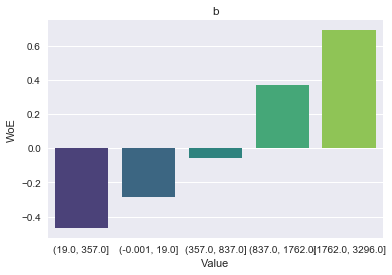

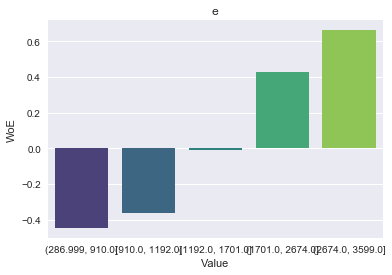

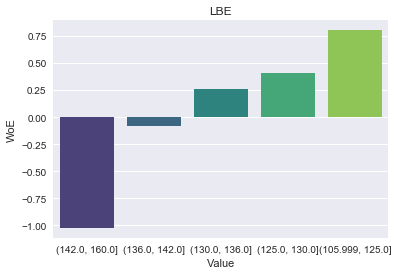

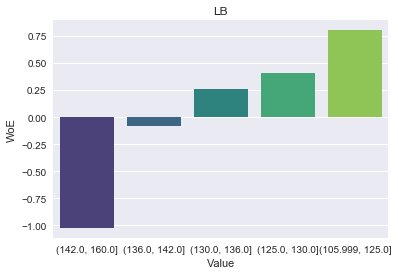

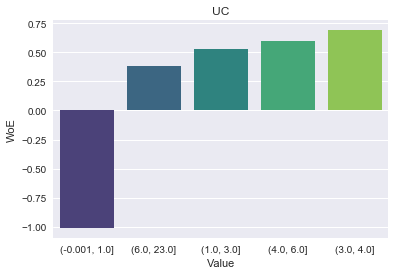

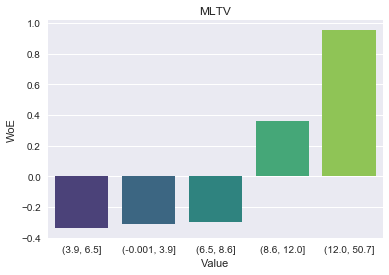

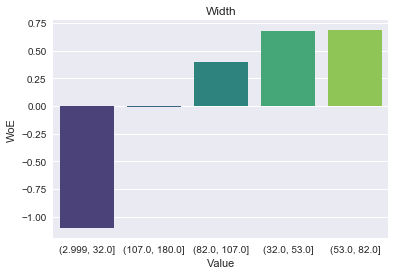

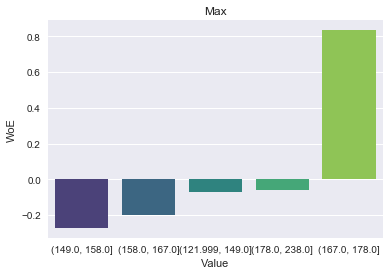

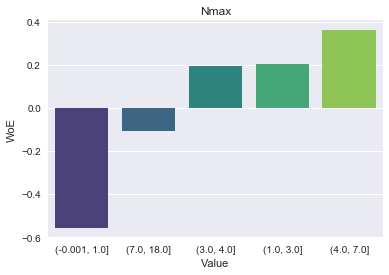

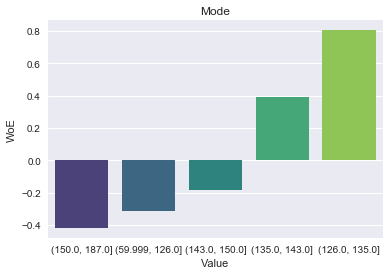

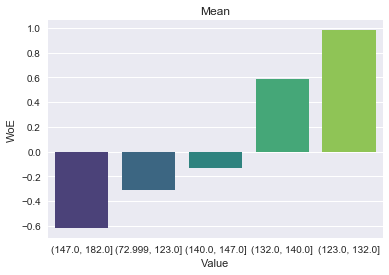

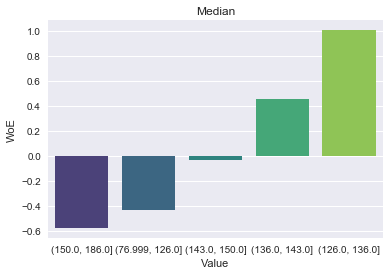

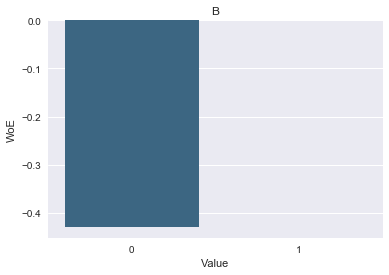

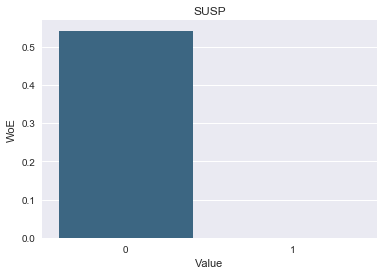

In [26]:
# grafički prikaz WoE za najjače varijable:

woe_list = ['b', 'e', 'LBE', 'LB', 'UC', 'MLTV', 'Width', 'Max', 'Nmax', 'Mode', 'Mean', 'Median', 'B', 'SUSP']

for col in woe_list:
    df3, iv = calculate_woe_iv(df1, col, 'NSP')
    plt.figure()
    sns.barplot(x="Value", y="WoE", palette="viridis", data=df3).set_title(col)

Za varijablu MLTV možemo uočiti da dvije kategorije [3.9, 6.5] i [-0.001, 3.9] imaju slične WoE vrijednosti što znači da ih možemo grupirati u isti razred.

In [27]:
# izrada dataframea koji sadrži woe i iv vrijednosti za varijablu MLTV
df_MLTV, iv = calculate_woe_iv(df1, 'MLTV', 'NSP')
df_MLTV

,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
3,"(3.9, 6.5]",435,311,124,0.187915,0.263270,-0.337187,0.025408
0,"(-0.001, 3.9]",436,314,122,0.189728,0.259023,-0.311326,0.021573
4,"(6.5, 8.6]",412,298,114,0.180060,0.242038,-0.295803,0.018333
1,"(8.6, 12.0]",418,349,69,0.210876,0.146497,0.364267,0.023451
2,"(12.0, 50.7]",425,383,42,0.231420,0.089172,0.953667,0.135657


In [28]:
# funkcija za grupiranje
def coarse_classer(df, indexloc_1, indexloc_2):
    mean_val = pd.DataFrame(np.mean(pd.DataFrame([df.iloc[indexloc_1], df.iloc[indexloc_2]]))).T
    original = df.drop([indexloc_1, indexloc_2])
    
    coarsed_df = pd.concat([original, mean_val])
    coarsed_df = coarsed_df.sort_values(by='WoE', ascending=False).reset_index(drop=True)
    
    return coarsed_df

In [29]:
# grupiranje kategorija varijable MLTV
df_MLTV = coarse_classer(df_MLTV, 3, 0)
df_MLTV

C:\Users\marin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,All,Bad,Distr_Bad,Distr_Good,Good,IV,Value,WoE
0,425.0,42.0,0.089172,0.231420,383.0,0.135657,"(12.0, 50.7]",0.953667
1,418.0,69.0,0.146497,0.210876,349.0,0.023451,"(8.6, 12.0]",0.364267
2,426.5,96.5,0.204883,0.199396,330.0,0.024430,NaN,0.013540
3,412.0,114.0,0.242038,0.180060,298.0,0.018333,"(6.5, 8.6]",-0.295803


Iz podataka iznad možemo zaključiti da je tipičan rizični profil (u ovom slučaju bolest ili sumnjivo stanje) slijedeći:

- ima vrijednost varijable b između 19.0 i 357.0

- ima vrijednost varijable e između 286.999 i 910.0

- ima vrijednost varijable LBE između 142.0 i 160.0

- ima vrijednost varijable LB između 142.0 i 160.0

- ima vrijednost varijable UC između -0.001 i 1.0

- ima vrijednost varijable MLTV između 3.9 i 6.5

- ima vrijednost varijable Width između 2.999 i 32.0

- ima vrijednost varijable Max između 149.0 i 158.0

- ima vrijednost varijable Nmax između -0.001 i 1.0

- ima vrijednost varijable Mode između 150.0 i 187.0

- ima vrijednost varijable Mean između 147.0 i 182.0

- ima vrijednost varijable Median između 150.0 i 186.0

- ima vrijednost varijable B jednaku 0

- ima vrijednost varijable SUSP jednaku 1

Prema IV score-u varijable: b, e, LBE, LB, UC, MLTV, Width, Max, Nmax, Mode, Mean, Median, B i SUSP "jaki" prediktori i redom znače:

- b (start instant)
- e (end instant)
- LBE (baseline value (medical expert))
- LB (baseline value (SisPorto))
- UC (uterine contractions (SisPorto))
- MLTV (mean value of long term variability  (SisPorto))
- Width (histogram width)
- Max (high freq. of the histogram)
- Nmax (number of histogram peaks)
- Mode (histogram mode)
- Mean (histogram mean)
- Median (histogram median)
- B (REM sleep)
- SUSP (suspect pattern)

Smatram da bi npr. varijabla SUSP trebala biti bolji prediktor jer predstavlja sumnjivi uzorak, ali nisam siguran da li sam dobro protumačio značenje varijabli.

Također, varijabla FS je opisana kao "flat-sinusoidal pattern (pathological state)" što bi značilo da varijabla NSP treba imati vrijednost 3 (pathologic) ako je FS = 1. Međutim, u analizi iznad vidimo da je IV za FS minimalan. Do toga je vjerojatno došlo zbog toga što sam za potrebe računanja WoE i IV redizajnirao ciljnu varijablu NSP da bude binarna te sam klasificirao "Normal (1)" stanje kao 0, a "Suspect (2)" i "Pathologic (3)" kao 1. "Suspect" i "Noramal" sam mogao grupirati kao 0, a "Pathologic" kao 1.

Set podataka ne dolazi s detaljnim opisom pa bi bilo dobro konzultirati se s medicinskim stručnjakom oko rezultata ove analize